### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

### The Sales & Advertising Dataset

In [2]:
sales = pd.read_csv(r"C:\Users\goura\Documents\advertising - ISLR.csv")

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
sales.shape

(200, 4)

### Predictor and Target

In [5]:
X = sales.drop(["Sales"], axis=1)
y = sales.Sales

In [6]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Train-Validation-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

### Fitting a Regression Tree

In [27]:
reg_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)

### Plotting a Regression Tree

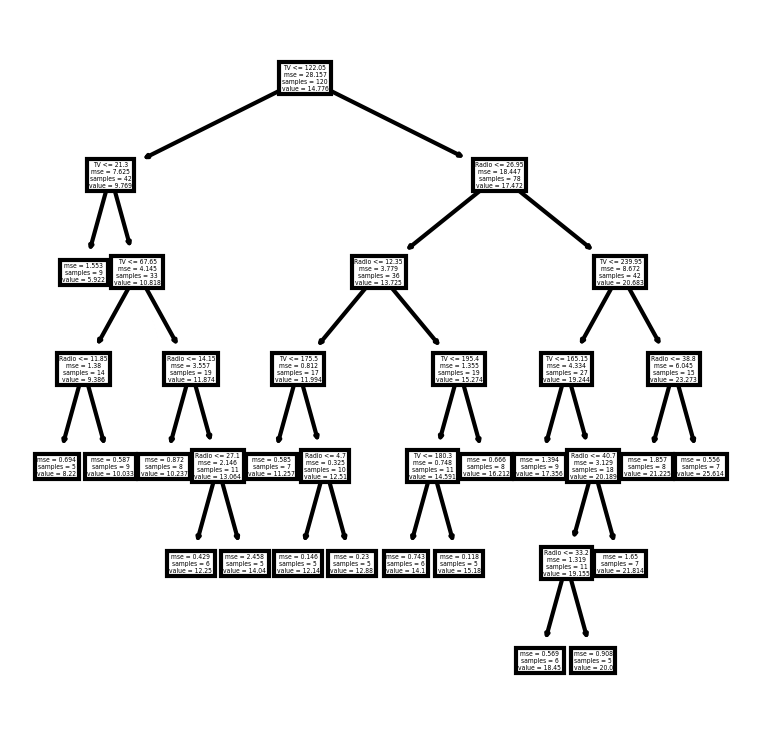

In [28]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

### Prediction

In [15]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 5.92222222, 13.06363636, 21.225     , 14.59090909, 10.03333333,
       13.06363636, 10.2375    , 12.51      , 13.06363636, 16.2125    ,
       14.59090909, 16.2125    ,  8.22      , 10.2375    , 12.51      ,
        5.92222222, 10.03333333, 20.18888889, 10.2375    , 12.51      ,
       20.18888889, 10.2375    , 16.2125    , 12.51      , 16.2125    ,
       10.2375    , 17.35555556, 11.25714286, 12.51      , 20.18888889,
       12.51      ,  8.22      , 10.03333333, 20.18888889, 13.06363636,
       20.18888889,  5.92222222,  5.92222222, 10.2375    , 12.51      ])

### Model Performance Checks

In [16]:
# MAE
np.mean(np.abs(y_valid - y_pred))

1.4593856421356421

In [17]:
# MSE
np.mean((y_valid - y_pred)**2)

3.2540817586651656

In [18]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

1.803907358670385

In [20]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

11.190894235245793

### Hyperparameter Tuning - Choosing Best Depth

In [22]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred))) #MAD

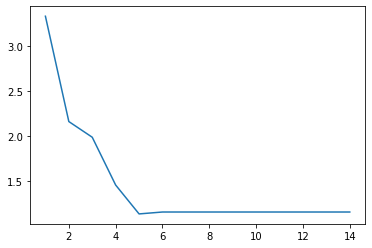

In [24]:
plt.plot(depth, np.array(mae))
plt.show()

In [ ]:
depth = [5,6,8,10]

### Final Testing